# </br>LIMPIEZA DE DATOS LESIONES-HECHOS

# 1. El problema del proyecto

El Observatorio de Movilidad y Seguridad Vial (OMSV), donde trabajo, como centro de estudios bajo la Secretaría de Transporte del Gobierno de la Ciudad Autónoma de Buenos Aires, me ha encargado la elaboración de un proyecto de análisis de datos. El objetivo es generar información que permita a las autoridades locales tomar medidas para reducir la cantidad de víctimas fatales en accidentes de tránsito. Para ello, me han proporcionado un conjunto de datos en formato xlsx que detalla los homicidios en siniestros viales ocurridos en la Ciudad de Buenos Aires entre 2016 y 2021. Este conjunto de datos, ya sea de homicidios o lesiones consta de dos hojas, "hechos" y "víctimas", y también incluye dos hojas adicionales con diccionarios de datos para facilitar la comprensión de la información proporcionada.

# 2. los Set de datos

La información recolectada por el OMSV se encuentran el archivo `lesiones.xlsx`

* `lesiones.xlsx`- Hoja HECHOS: Cuenta con  27 Columnas y 23785 filas 
Cada registro contiene 27 características o columnas.  Las columnas son:
1. "id":	identificador unico del siniestro
2. "n_victimas":	cantidad de víctimas
3. "aaaa":	año
4. "mm":	mes
5. "dd":	día del mes
6. "fecha":	fecha en formato dd/mm/aaaa
7. "hora":	hora del siniestro
8. "franja_hora":	franja horaria entera
9. "direccion_normalizada":	direccion en formato normalizado USIG
10. "comuna":	comuna de CABA con jurisdicción según la ubicación
11. "tipo_calle":	Tipo de arteria. En el caso de intersecciones a nivel se clasifica según la de mayor jerarquía
12. "otra_direccion":	direccion en formato alternativo
13. "calle":	nombre de la arteria donde se produjo el hecho
14. "altura":	altura de la arteria donde se produjo el hecho
15. "cruce":	cruce en caso de que sea una encrucijada
16. "geocodificacion_CABA":	geocodificación plana
17. "longitud":	longitud con separador punto. WGS84
18. "latutid":	latitud con separador punto. WGS84
19. "victima":	Vehículo que ocupaba quien haya fallecido a se haya lastimado a raíz del hecho, o bien peatón/a
20. "acusado":	Vehículo que ocupaba quien resultó acusado/a del hecho, sin implicar culpabilidad legal
21. "participantes":	conjunción de víctima y acusado
22. "moto":	participación de algún motovehículo, sea víctima u acusado
23. "auto":	participación de algún automovil, sea víctima u acusado
24. "transporte_publico":	participación de algún vehículo de transporte público de pasajeros, sea víctima u acusado
25. "camion":	participación de algún vehículo de cargas camión, sea víctima u acusado
26. "ciclista":	participación de algún ciclista, sea víctima u acusado
27. "gravedad":	Nivel máximo conocido de gravedad de la lesión de la(s) víctima(s) del siniestro en función del tiempo de hospitalización

# 3. Una primera mirada al dataset

In [132]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Revisando la hoja: HECHOS en el archivo de lesiones.xls

In [133]:
# Nombre del archivo Excel
archivo_excel = 'lesiones.xlsx'

# Leer el archivo Excel y cargarlo en un DataFrame
df_lesiones_H = pd.read_excel(archivo_excel, sheet_name='HECHOS')

# Suponiendo que 'df' es tu DataFrame
dimensiones = df_lesiones_H.shape

# Obtener el número de filas y columnas
num_filas = dimensiones[0]
num_columnas = dimensiones[1]

# Imprimir las dimensiones
print("Número de filas del Dataset homicidios HECHOS:", num_filas)
print("Número de columnas del Dataset homicidios HECHOS:", num_columnas)
# Vemos el encabezado con pocas filas
df_lesiones_H.head()

Número de filas del Dataset homicidios HECHOS: 23785
Número de columnas del Dataset homicidios HECHOS: 27


,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


# 4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pero vemos que no hay regitros nulos, sin embargo se ejecuta la línea que se encarga de eliminar registros de columnas.

In [134]:
df_lesiones_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  12867 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  9407 non-null   object 
 15  ge

Veo que la columna 'otra_direccion' tiene información valiosa para complementar las columnas 'calle' y 'cruce'. Primero debemos evaluar ciertas caracteristicas
1) Si no tiene el caracter ' y ', se reemplaza por una coma y se puede eliminar la coma siguiente
2) Si no hay ' y ' podemos dejar la columna como viene por defecto del repositorio de datos


In [135]:
# Función para procesar cada registro de 'otra_direccion'
def procesar_direccion(direccion):
    if ' y ' in direccion:
        # Reemplazar ' y ' por una coma
        direccion = direccion.replace(' y ', ',')
        # Buscar la posición de la coma reemplazada
        index_coma = direccion.index(',')
        # Encontrar la siguiente coma después de la que acabamos de poner y eliminarla
        index_siguiente_coma = direccion.find(',', index_coma + 1)
        if index_siguiente_coma != -1:  # Si se encuentra una coma siguiente
            direccion = direccion[:index_siguiente_coma] + direccion[index_siguiente_coma+1:]
    return direccion

# Aplicar la función a la columna 'otra_direccion'
df_lesiones_H['otra_direccion'] = df_lesiones_H['otra_direccion'].apply(procesar_direccion)



In [136]:
# Función para procesar la columna 'otra_direccion' si no contiene 'SD'
def procesar_direccion_si_no_SD(direccion, calle_actual, cruce_actual):
    if 'SD' not in direccion:  # Verificar si 'SD' no está presente en la dirección
        partes = direccion.split(',')
        if len(partes) > 1:
            calle = partes[0].strip()
            cruce = partes[1].strip()
            if 'Barrio' in cruce or 'jurisdicción comisaria' in cruce or 'Comisaria' in cruce:
                cruce = None
        else:
            calle, cruce = None, None
        return calle, cruce
    else:
        return calle_actual, cruce_actual  # Devolver los valores actuales de calle y cruce si 'SD' está presente

# Aplicar la función a la columna 'otra_direccion' solo si no contiene la cadena 'SD'
df_lesiones_H['calle'], df_lesiones_H['cruce'] = zip(*df_lesiones_H.apply(lambda row: procesar_direccion_si_no_SD(row['otra_direccion'], row['calle'], row['cruce']), axis=1))

# Información sobre las columnas 'calle' y 'cruce' después de aplicar la función
print(df_lesiones_H[['calle', 'cruce']].info())
#df_lesiones_H.to_excel('hola.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   calle   18326 non-null  object
 1   cruce   11789 non-null  object
dtypes: object(2)
memory usage: 371.8+ KB
None


In [137]:
import re
# Función para eliminar los números al final de cada registro
def eliminar_numeros_final_y_evaluar(categoria):
    if pd.isna(categoria):
        return categoria
    else:
        return re.sub(r'\d{3}$', '', categoria)

# Aplicar la función a la columna 'calle'
df_lesiones_H['calle'] = df_lesiones_H['calle'].apply(eliminar_numeros_final_y_evaluar)

In [138]:
import re
import pandas as pd

# Función para extraer la palabra en común y eliminar los números
def unificar_categorias(categoria):
    if pd.isna(categoria):  # Verificar si la categoría es NaN
        return categoria
    else:
        palabras = categoria.split()[:3]
        palabra_comun = ' '.join(palabras)  # Unir las tres primeras palabras
        
        # Eliminar los números al final de la palabra común
        palabra_comun_sin_numeros = re.sub(r'\d+$', '', palabra_comun)
        
        return palabra_comun_sin_numeros

# Aplicar la función a la columna 'calle'
df_lesiones_H['calle'] = df_lesiones_H['calle'].apply(unificar_categorias)


In [139]:
df_lesiones_H.to_excel('hola2.xlsx')

In [140]:
df_lesiones_H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23785 entries, 0 to 23784
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23785 non-null  object 
 1   n_victimas             23785 non-null  int64  
 2   aaaa                   23785 non-null  int64  
 3   mm                     23785 non-null  int64  
 4   dd                     23785 non-null  int64  
 5   fecha                  23785 non-null  object 
 6   hora                   23785 non-null  object 
 7   franja_hora            23780 non-null  object 
 8   direccion_normalizada  23732 non-null  object 
 9   comuna                 23616 non-null  object 
 10  tipo_calle             23785 non-null  object 
 11  otra_direccion         23785 non-null  object 
 12  calle                  18326 non-null  object 
 13  altura                 12771 non-null  float64
 14  cruce                  11789 non-null  object 
 15  ge

In [141]:
# Contar cuántos registros de 'calle' son 'SD'
cantidad_SD = (df_lesiones_H['calle'] == 'SD').sum()

# Imprimir el resultado
print("Cantidad de registros de 'calle' que son 'SD':", cantidad_SD)

Cantidad de registros de 'calle' que son 'SD': 0


In [142]:
# Contar cuántos registros de 'calle' son 'SD'
cantidad_SD = (df_lesiones_H['cruce'] == 'SD').sum()

# Imprimir el resultado
print("Cantidad de registros de 'cruce' que son 'SD':", cantidad_SD)

Cantidad de registros de 'cruce' que son 'SD': 0


conserva la totalidad de registros.

In [143]:
df_homicidios_V.head()

NameError: name 'df_homicidios_V' is not defined

## 4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**.
- **Una columna categórica pero con un sólo nivel**. 
- **Una columna numérica pero con un sólo valor**.
- **Columnas con información redundante**.

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

In [ ]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['ROL', 'VICTIMA', 'SEXO','EDAD', 'VICTIMA', 'FECHA_FALLECIMIENTO' ]
for col in cols_cat:
  print(f'Columna {col}: {df_homicidios_V[col].nunique()} subniveles')

Columna ROL: 5 subniveles
Columna VICTIMA: 8 subniveles
Columna SEXO: 3 subniveles
Columna EDAD: 86 subniveles
Columna VICTIMA: 8 subniveles
Columna FECHA_FALLECIMIENTO: 563 subniveles


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

In [ ]:
df_homicidios_V.describe()

,AAAA,MM,DD
count,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948
std,1.672655,3.575140,8.683358
min,2016.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000
50%,2018.000000,7.000000,16.000000
75%,2019.000000,10.000000,23.000000
max,2021.000000,12.000000,31.000000


Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

## 4.3 Filas repetidas 

In [ ]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_homicidios_V.shape}')
df_homicidios_V.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df_homicidios_V.shape}')

Tamaño del set antes de eliminar las filas repetidas: (717, 10)
Tamaño del set después de eliminar las filas repetidas: (717, 10)


## 4.4 *Outliers* en las variables numéricas 

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

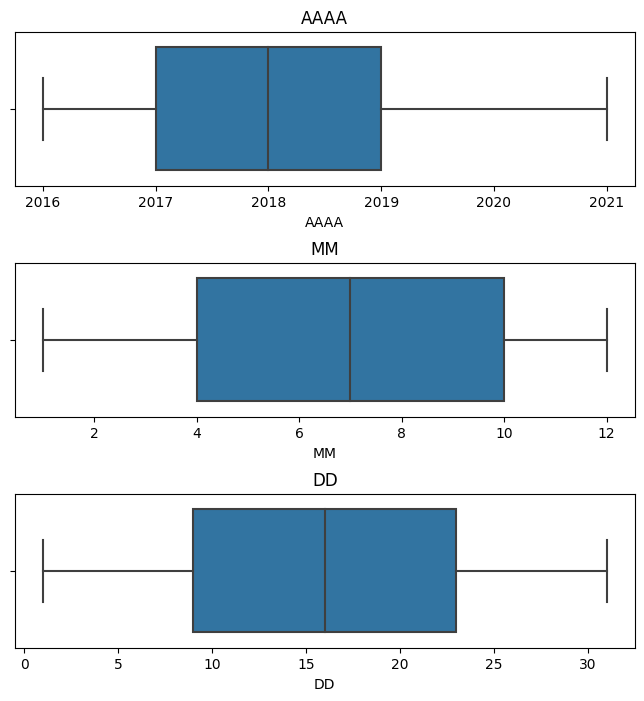

In [ ]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['AAAA', 'MM', 'DD']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8,8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df_homicidios_V, ax=ax[i])
    ax[i].set_title(col)

# 4.5 Errores tipográficos en variables categóricas
En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

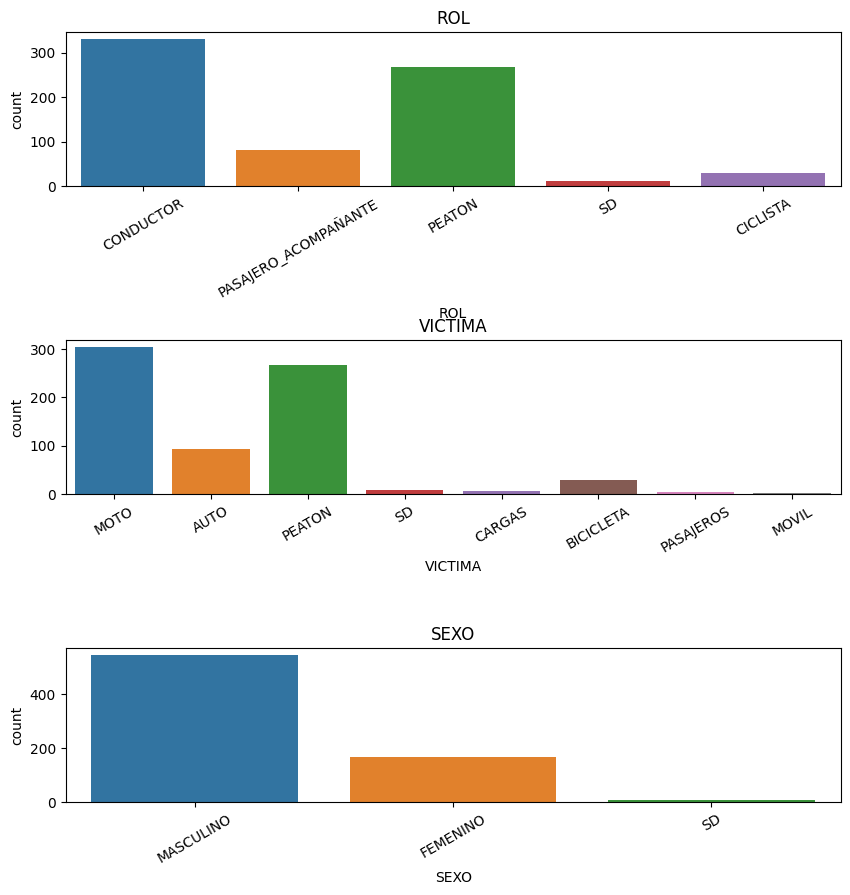

In [ ]:
# Graficar los subniveles de cada variable categórica
cols_cat = [ 'ROL', 'VICTIMA', 'SEXO' ]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,10))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=df_homicidios_V, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

Eliminamos los registros que contienen 'SD' sin dato debido a que el análisis se puede afectado por registros que en realidad no tienen una información precisa.

In [ ]:
df_homicidios_V = df_homicidios_V[~df_homicidios_V['ROL'].str.contains('SD')]
df_homicidios_V = df_homicidios_V[~df_homicidios_V['SEXO'].str.contains('SD')]
df_homicidios_V = df_homicidios_V[~df_homicidios_V['VICTIMA'].str.contains('SD')]
df_homicidios_V.shape

(702, 10)

¡Y listo, ya hemos realizado la limpieza de nuestro set de datos!

Originalmente tenía 717 registros y 10 columnas. El dataset resultante tiene 702 filas (27 menos) y 18 columnas.

El set de datos ya está listo para el Análisis Exploratorio.

In [ ]:
# Guardar el DataFrame como un archivo CSV sin incluir el índice
df_homicidios_V.to_csv('homicidios_V.csv', index=False)